<h5> Importing Libraries </h5>

In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math   
from scipy import stats as st 

<h5> Loading the data </h5>

In [2]:
dirty_training_set = pd.read_csv('train_lr.csv')
dirty_test_set = pd.read_csv('test_lr.csv')

In [3]:
dirty_training_set.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
training_set = dirty_training_set.dropna() 
test_set = dirty_test_set.dropna()

In [5]:
print ("Rows before clean: ", dirty_training_set.size, "\n")
print ("Rows after clean: ", training_set.size, "\n")

Rows before clean:  1400 

Rows after clean:  1398 



In [6]:
print (training_set.loc[0:5]['y'])
print (training_set.loc[0:5]['x'])

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64


In [7]:
x_training_set = training_set.as_matrix(['x'])
y_training_set = training_set.as_matrix(['y'])


x_test_set = test_set.as_matrix(['x'])
y_test_set = test_set.as_matrix(['y'])

C:\Users\HI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\HI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
print ("Mean of X Training set: ", np.mean(x_training_set), "\n")
print ("Median of X Training set: ", np.median(x_training_set), "\n")
print ("Mean of Y Training set: ", np.mean(y_training_set), "\n")
print ("Median of Y Training set: ", np.median(y_training_set), "\n")
print ("Std Dev of X Training set: ", np.std(x_training_set), "\n")
print ("Std Dev of Y Training set: ", np.std(y_training_set), "\n")

Mean of X Training set:  50.01430615164521 

Median of X Training set:  49.0 

Mean of Y Training set:  49.939869170457804 

Median of Y Training set:  48.97302037 

Std Dev of X Training set:  28.933841385275375 

Std Dev of Y Training set:  29.08838760426971 



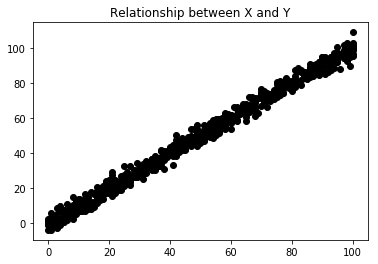

In [9]:
plt.title('Relationship between X and Y')
plt.scatter(x_training_set, y_training_set,  color='black')
plt.show()

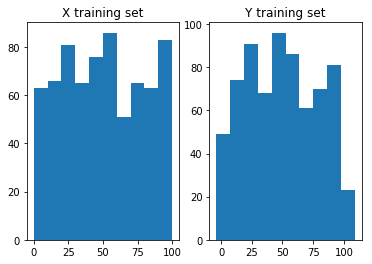

In [10]:
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_training_set)
plt.show()

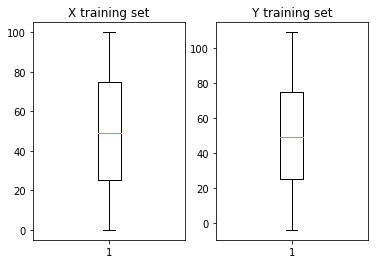

In [11]:
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_training_set)
plt.show()

<h3> Linear Regression </h3>

In [12]:
lm = linear_model.LinearRegression()
lm.fit(x_training_set,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('R sq: ',lm.score(x_training_set,y_training_set))

R sq:  0.9907015319025518


In [14]:
print('Correlation: ', math.sqrt(lm.score(x_training_set,y_training_set)))

Correlation:  0.9953399077212527


In [15]:
print("Coefficient for X ", lm.coef_)

Coefficient for X  [[1.00065638]]


In [16]:
print ("Standard Error: ",st.sem(x_training_set))

Standard Error:  [1.09516205]


In [17]:
ttest = lm.coef_/st.sem(x_training_set)
print ("The t-statistic:",ttest)

The t-statistic: [[0.91370623]]


In [18]:
print ("Two tailed p-values: ")
st.pearsonr(x_training_set, y_training_set)

Two tailed p-values: 


(array([0.99533991]), array([0.]))

In [19]:
TSS = y_training_set
TSS = [i**2 for i in TSS]   
TSS = np.sum(TSS)

In [20]:
y_predicted = lm.predict(x_training_set)   
y_variance = y_training_set - y_predicted 
y_variance = [i**2 for i in y_variance]   
RSS = np.sum(y_variance)

Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)

The F-statistic is:   295202.86908682744


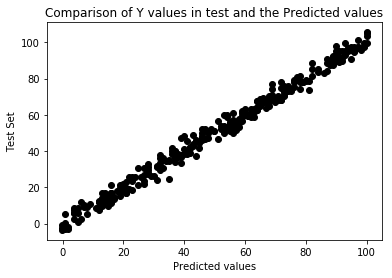

In [21]:
y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test_set,  color='black')
plt.show()